# Parte 1: Estadísticas para ingenieros que miran el cielo


## 1.1 Promedio y desvio

### Melbourne

In [332]:
import csv

from IPython.testing.decorators import onlyif_unicode_paths

archivo='temperature_Melbourne_celsius.csv'
valores_melbourne= []
promedio_melbourne = 0.0
with open(archivo, 'r') as archivo:
    reader = csv.reader(archivo)
    next(reader)  
    valores_melbourne = [float(fila[0]) for fila in reader]

promedio_melbourne = sum(valores_melbourne) / len(valores_melbourne)
varianza_melbourne = sum((x - promedio_melbourne)**2 for x in valores_melbourne ) / (len(valores_melbourne) - 1) 
desvio_melbourne=varianza_melbourne**(0.5)

print("Promedio:", promedio_melbourne)
print("Varianza:", varianza_melbourne)
print("Desvio:", desvio_melbourne)


Promedio: 17.53388090349076
Varianza: 41.96000198204841
Desvio: 6.477654049271882


### Oslo

In [333]:
import csv
archivo='temperature_Oslo_celsius.csv'
valores_oslo= []
promedio_oslo = 0.0
with open(archivo, 'r') as archivo:
    reader = csv.reader(archivo)
    next(reader)  
    valores_oslo = [float(fila[0]) for fila in reader]

promedio_oslo = sum(valores_oslo) / len(valores_oslo)
varianza_oslo = sum((x - promedio_oslo)**2 for x in valores_oslo ) / (len(valores_oslo) - 1) 
desvio_oslo=varianza_oslo**(0.5)

print("Promedio:", promedio_oslo)
print("Varianza:", varianza_oslo)
print("Desvio:", desvio_oslo)

Promedio: 4.611225188227242
Varianza: 89.52365285429613
Desvio: 9.461693973823934


### Quito

In [334]:
import csv
archivo='temperature_Quito_celsius.csv'
valores_quito= []
promedio_quito = 0.0
with open(archivo, 'r') as archivo:
    reader = csv.reader(archivo)
    next(reader)  
    valores_quito = [float(fila[0]) for fila in reader]

promedio_quito = sum(valores_quito) / len(valores_quito)
varianza_quito = sum((x - promedio_quito)**2 for x in valores_quito ) / (len(valores_quito) - 1) 
desvio_quito=varianza_quito**(0.5)

print("Promedio:", promedio_quito)
print("Varianza:", varianza_quito)
print("Desvio:", desvio_quito)

Promedio: 13.603524982888432
Varianza: 1.6943979779826284
Desvio: 1.3016904309330342


## 1.2 Calcular el factor de correlación cruzada entre cada par de señales

In [335]:
def correlacion_cruzada(valores_A, valores_B, desvio_A, desvio_B, promedio_A, promedio_B):
    producto=0
    for i in range(0, len(valores_A)):
        producto = producto + (valores_A[i] * valores_B[i] - promedio_A * promedio_B)
    
    cov=(producto)/len(valores_A)

    correlacion_A_B = cov / (desvio_A * desvio_B)

    print(correlacion_A_B)


### Melbourne y Oslo

In [336]:
correlacion_cruzada(valores_melbourne, valores_oslo, desvio_melbourne, desvio_oslo, promedio_melbourne, promedio_oslo)

-0.22128773176900715


### Melbourne y Quito

In [337]:
correlacion_cruzada(valores_melbourne, valores_quito, desvio_melbourne, desvio_quito, promedio_melbourne, promedio_quito)

-0.05331188809647593


### Oslo y Quito

In [338]:
correlacion_cruzada(valores_oslo, valores_quito, desvio_oslo, desvio_quito, promedio_oslo, promedio_quito)

0.06617787220981441


Con estos datos podemos decir que las temperaturas en las distintas ciudades no tienen nada que ver una con la otra, el clima de una no nos aporta ninguna información sobre el clima en las otras ciudades

# Parte 2: Una fuente de calor... markoviana

In [339]:
def crear_fuente(valores):
    fuente = []
    for i in valores:
        if (i < 11.0):
            fuente.append(0)
        elif ((i >= 11.0) and (i < 19.0)):
            fuente.append(1)
        else:
            fuente.append(2)
    return fuente

In [340]:
fuente_quito = crear_fuente(valores_quito)
fuente_melbourne = crear_fuente(valores_melbourne)
fuente_oslo = crear_fuente(valores_oslo)

print(fuente_quito )
print(fuente_melbourne)
print(fuente_oslo)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## 1. Matrices de transición

In [341]:
import numpy as np

def matriz_transicion(fuente):
    m_transicion = np.zeros((3, 3), dtype=float)

    for i in range(1, len(fuente)):
        m_transicion[fuente[i], fuente[i - 1]] += 1

    # Sumar columnas
    suma_columnas = [0, 0, 0]
    for i in range(3):
        for j in range(3):
            suma_columnas[j] += m_transicion[i, j]

    # Normalizar columnas
    for i in range(3):
        for j in range(3):
            if suma_columnas[j] != 0:
                m_transicion[i, j] /= suma_columnas[j]

    print("Matriz de transición:")
    print(m_transicion)
    #print("Sumas por columna:")
    #print(suma_columnas)
    return m_transicion


In [342]:
m_transicion_quito = matriz_transicion(fuente_quito)
m_transicion_melbourne = matriz_transicion(fuente_melbourne)
m_transicion_oslo = matriz_transicion(fuente_oslo)

Matriz de transición:
[[5.40540541e-02 6.03240262e-03 0.00000000e+00]
 [9.45945946e-01 9.93278180e-01 1.00000000e+00]
 [0.00000000e+00 6.89417442e-04 0.00000000e+00]]
Matriz de transición:
[[0.47       0.03347988 0.00260611]
 [0.495      0.83564423 0.14408042]
 [0.035      0.13087589 0.85331348]]
Matriz de transición:
[[0.95932119 0.09939024 0.        ]
 [0.04067881 0.8652439  0.29591837]
 [0.         0.03536585 0.70408163]]


## 2. Muestreo Montecarlo

### Probabilidad estacionaria

#### Calculamos la matriz de transicion acumulada 

In [343]:
def matriz_acumulada(m_transicion):
    m_acumulada = np.zeros((3, 3), dtype=float)

    for j in range(3):
        m_acumulada[0][j] = m_transicion[0, j]

    for i in range(1, 3):
        for j in range(0, 3):
            m_acumulada[i][j] = m_acumulada[i-1][j] + m_transicion[i][j]
    
    return m_acumulada

In [344]:
m_acumulada_quito = matriz_acumulada(m_transicion_quito)
m_acumulada_melbourne = matriz_acumulada(m_transicion_melbourne)
m_acumulada_oslo = matriz_acumulada(m_transicion_oslo)

print(m_acumulada_quito)
print(m_acumulada_melbourne)
print(m_acumulada_oslo)

[[0.05405405 0.0060324  0.        ]
 [1.         0.99931058 1.        ]
 [1.         1.         1.        ]]
[[0.47       0.03347988 0.00260611]
 [0.965      0.86912411 0.14668652]
 [1.         1.         1.        ]]
[[0.95932119 0.09939024 0.        ]
 [1.         0.96463415 0.29591837]
 [1.         1.         1.        ]]


#### Calculamos las probabilidades del primer simbolo y la probabilidad acumulada

In [345]:
def probabilidad_simbolos(fuente):
    probabilidad = [0, 0, 0]
    for s in fuente:
        probabilidad[s] += 1

    for i in range(3):
        probabilidad[i] = probabilidad[i] / len(fuente)
    
    return probabilidad

In [346]:
prob_quito = probabilidad_simbolos(fuente_quito)
prob_melbourne = probabilidad_simbolos(fuente_melbourne)
prob_oslo = probabilidad_simbolos(fuente_oslo)

print(prob_quito)
print(prob_melbourne)
print(prob_oslo)

[0.006331279945242984, 0.992984257357974, 0.0006844626967830253]
[0.034223134839151265, 0.5059890485968515, 0.45978781656399725]
[0.6858316221765913, 0.2806297056810404, 0.03353867214236824]


In [347]:
def probabilidad_simb_acumulada(prob):
    prob_acumulada = [0, 0, 0]

    prob_acumulada[0] = prob[0]

    for i in range (1, 3):
        prob_acumulada[i] = prob_acumulada[i-1] + prob[i]

    return prob_acumulada

In [348]:
prob_acumulada_quito = probabilidad_simb_acumulada(prob_quito)
prob_acumulada_melbourne = probabilidad_simb_acumulada(prob_melbourne)
prob_acumulada_oslo = probabilidad_simb_acumulada(prob_oslo)

print(prob_acumulada_quito)
print(prob_acumulada_melbourne)
print(prob_acumulada_oslo)

[0.006331279945242984, 0.999315537303217, 1.0]
[0.034223134839151265, 0.5402121834360027, 1.0]
[0.6858316221765913, 0.9664613278576317, 1.0]


In [349]:
import random

S_MIN = 1000
VENTANA_CONVERGENCIA = 50

def primer_simb(prob_acum_v0):
    r = random.random()
    for i in range(3):
        if r < prob_acum_v0[i]:
            return i

def sig_dado_ant(s_ant, m_acumulada):
    r = random.random()
    for i in range(3):
        if r < m_acumulada[i][s_ant]:
            return i

def converge(A, B):
    epsilon = 0.001
    for i in range(3):
        if abs(A[i] - B[i]) > epsilon:
            return False
    return True

def distancia(v1, v2):
    return sum(abs(v1[i] - v2[i]) for i in range(3))
 
def calcular_vector_estacionario(m_acumulada, prob_acum_v0):
    emisiones = [0, 0, 0]
    V = [0, 0, 0]
    V_ant = [-1, -1, -1]
    cant_simb = 0
    diferencia_vectores = []
    iteraciones = []
    punto_convergencia = 0
    contador_convergencia = 0

    s = primer_simb(prob_acum_v0)
    
    while (contador_convergencia < VENTANA_CONVERGENCIA or cant_simb < S_MIN):
        s = sig_dado_ant(s, m_acumulada)
        emisiones[s] += 1
        cant_simb += 1
        V_ant = V.copy()

        for i in range(3):
            V[i] = emisiones[i] / cant_simb

        if converge(V, V_ant):
            contador_convergencia += 1
            if punto_convergencia == 0 and contador_convergencia >= VENTANA_CONVERGENCIA:
                punto_convergencia = cant_simb
        else:
            contador_convergencia = 0 

        diferencia_actual = distancia(V, V_ant)
        diferencia_vectores.append(diferencia_actual)
        iteraciones.append(cant_simb)

    return V, diferencia_vectores, iteraciones, punto_convergencia


In [350]:
v_estacionario_quito, diferencia_quito, iteraciones_quito, convergencia_quito  = calcular_vector_estacionario(m_acumulada_quito, prob_acumulada_quito)
v_estacionario_melbourne, diferencia_melbourne, iteraciones_melbourne, convergencia_melbourne = calcular_vector_estacionario(m_acumulada_melbourne, prob_acumulada_melbourne)
v_estacionario_oslo, diferencia_oslo, iteraciones_oslo, convergencia_oslo = calcular_vector_estacionario(m_acumulada_oslo, prob_acumulada_oslo)

print(f"Vector estacionario para la ciudad de Quito: {v_estacionario_quito}")
print(f"Valor de convergencia: {convergencia_quito}")
print(" ")
print(f"Vector estacionario para la ciudad de Melbourne: {v_estacionario_melbourne}")
print(f"Valor de convergencia: {convergencia_melbourne}")
print(" ")
print(f"Vector estacionario para la ciudad de Oslo: {v_estacionario_oslo}")
print(f"Valor de convergencia: {convergencia_oslo}")

Vector estacionario para la ciudad de Quito: [0.004, 0.994, 0.002]
Valor de convergencia: 51
 
Vector estacionario para la ciudad de Melbourne: [0.027, 0.436, 0.537]
Valor de convergencia: 622
 
Vector estacionario para la ciudad de Oslo: [0.708498023715415, 0.27865612648221344, 0.012845849802371542]
Valor de convergencia: 491


Ahora que tenemos tanto los vectores estacionarios, como las diferencias y las iteraciones donde se producen esas diferencias, podemos hacer un gráfico para observar de mejor manera esta convergencia en las probabilidades de los símbolos

In [351]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_convergencia(iteraciones, diferencia_vectores, nombre_ciudad, convergencia):
    plt.figure(figsize=(10, 6))
    plt.plot(iteraciones, diferencia_vectores, label="Distancia entre vectores", color='red', linewidth=1.5)
    plt.xlabel('Cantidad de símbolos generados', fontsize=12)
    plt.axvline(x=convergencia, linestyle='--', color='green', linewidth=1.5, label=f'Convergencia en {convergencia}')
    plt.text(
        convergencia,
        max(diferencia_vectores)*0.9,
        f'{convergencia}',
        rotation=90,
        va='bottom', ha='right',
        fontsize=10,
        color='green'
    )
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.xticks(np.arange(0, 1001, 50))
    plt.ylabel('Distancia', fontsize=12)
    plt.title(f"Convergencia del Vector Estacionario {nombre_ciudad}", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=11, loc='upper right')
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)  # Ajuste manual de márgenes
    plt.show()


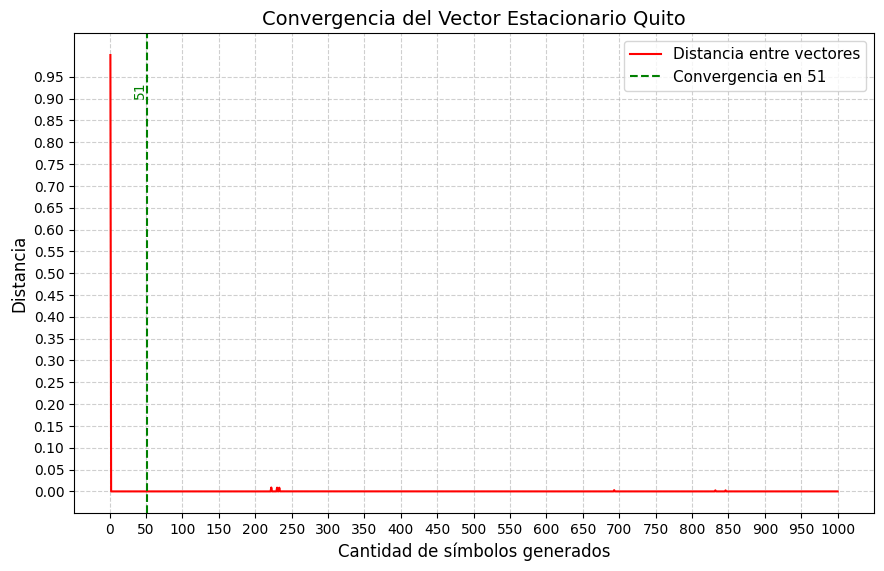

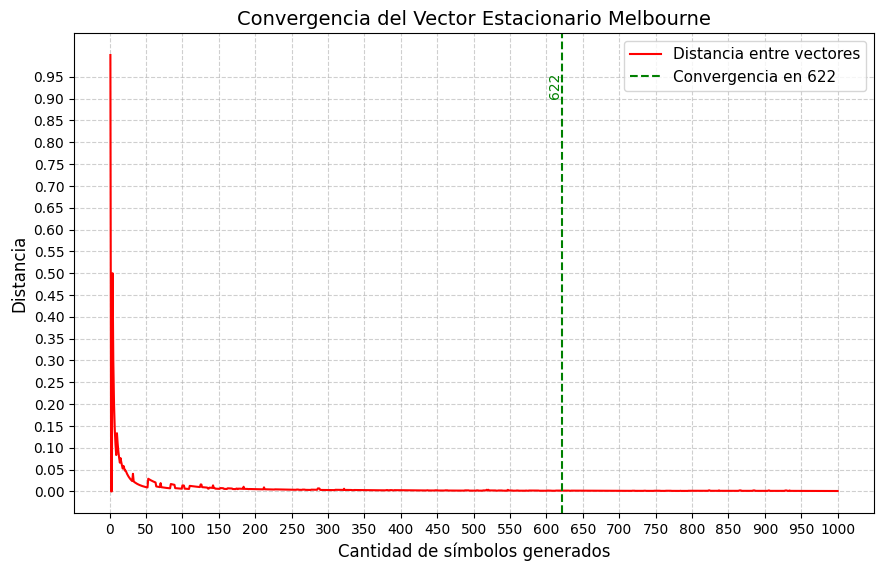

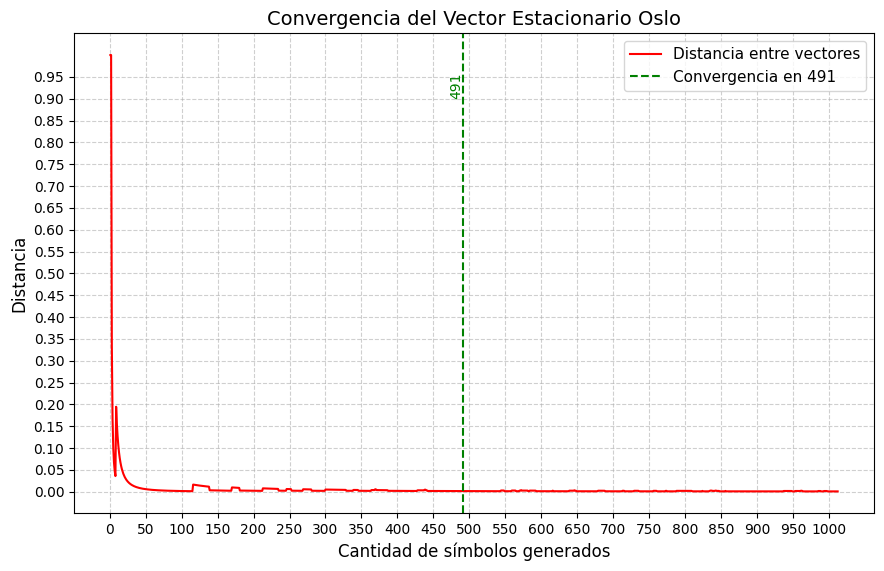

In [352]:
graficar_convergencia(iteraciones_quito, diferencia_quito, "Quito", convergencia_quito)
graficar_convergencia(iteraciones_melbourne, diferencia_melbourne, "Melbourne", convergencia_melbourne)
graficar_convergencia(iteraciones_oslo, diferencia_oslo, "Oslo", convergencia_oslo)

### Tiempo medio de primera recurrencia

In [353]:
S_MIN = 1000

def converge(A, B):
    epsilon = 0.05
    if abs(A - B) > epsilon:
        return False
    return True

def sig_dado_ant(s_ant, m_acumulada):
    r = random.random()
    for i in range(3):
        if r < m_acumulada[i][s_ant]:
            return i


def Media_recurrencia(simbolo,m_acumulada):
    retornos=0
    media=0
    media_ant=-1
    t_actual=0
    s=simbolo
    while (not converge(media,media_ant)or (t_actual<S_MIN)):
        s=sig_dado_ant(s,m_acumulada)
        t_actual+=1
        if(s==simbolo):
            retornos+=1
            media_ant=media
            media=t_actual/retornos

    return media

### Media de recurrencia para simbolos F,T,C Quito

In [354]:
print("Media de primera recurrencia para simbolo F "+str(Media_recurrencia(0,m_acumulada_quito)))
print("Media de primera recurrencia para simbolo T "+str(Media_recurrencia(1,m_acumulada_quito)))
print("Media de primera recurrencia para simbolo C "+str(Media_recurrencia(2,m_acumulada_quito)))

Media de primera recurrencia para simbolo F 173.4949494949495
Media de primera recurrencia para simbolo T 1.0111223458038423
Media de primera recurrencia para simbolo C 1503.110119047619


### Media de recurrencia para simbolos F,T,C Melborne

In [355]:
print("Media de primera recurrencia para simbolo F "+str(Media_recurrencia(0,m_acumulada_melbourne)))
print("Media de primera recurrencia para simbolo T "+str(Media_recurrencia(1,m_acumulada_melbourne)))
print("Media de primera recurrencia para simbolo C "+str(Media_recurrencia(2,m_acumulada_melbourne)))

Media de primera recurrencia para simbolo F 40.18604651162791
Media de primera recurrencia para simbolo T 2.159827213822894
Media de primera recurrencia para simbolo C 1.968503937007874


### Media de recurrencia para simbolos F,T,C Oslo

In [356]:
print("Media de primera recurrencia para simbolo F: "+str(Media_recurrencia(0,m_acumulada_oslo)))
print("Media de primera recurrencia para simbolo T: "+str(Media_recurrencia(1,m_acumulada_oslo)))
print("Media de primera recurrencia para simbolo C: "+str(Media_recurrencia(2,m_acumulada_oslo)))

Media de primera recurrencia para simbolo F: 1.422475106685633
Media de primera recurrencia para simbolo T: 3.676470588235294
Media de primera recurrencia para simbolo C: 33.733333333333334


# Parte 3: Entropía, Huffman y la batalla por los bits

### Entropía sin memoria

In [357]:
import math

def entropia_sin_mem(prob):
    entropia = 0
    for i in range(len(prob)):
        if prob[i] > 0:
            entropia += - prob[i] * math.log2(prob[i])
    return entropia

In [358]:
entropia_quito = entropia_sin_mem(v_estacionario_quito)
entropia_melbourne = entropia_sin_mem(v_estacionario_melbourne)
entropia_oslo = entropia_sin_mem(v_estacionario_oslo)

print(f"Entropía sin memoria quito: {entropia_quito}")
print(f"Entropia sin memoria melbourne: {entropia_melbourne}")
print(f"Entropia sin memoria oslo: {entropia_oslo}")

Entropía sin memoria quito: 0.0584248553491746
Entropia sin memoria melbourne: 1.1445400212227668
Entropia sin memoria oslo: 0.9466311121927689


### Entropía con memoria

In [359]:
def calcular_entropia_memoria(probabilidades, matriz_transicion):
    hcond = 0
    for j in range(len(probabilidades)):
        hi = 0
        for i in range(len(probabilidades)):
            p = matriz_transicion[j][i]
            if p > 0:
                hi += p * math.log2(p)
        hcond += probabilidades[j] * (-hi)
    return hcond

In [360]:
entropia_cond_quito = calcular_entropia_memoria(v_estacionario_quito, m_transicion_quito)
entropia_cond_melbourne = calcular_entropia_memoria(v_estacionario_melbourne, m_transicion_melbourne)
entropia_cond_oslo = calcular_entropia_memoria(v_estacionario_oslo, m_transicion_oslo)

print(f"Entropia quito con memoria 1: {entropia_cond_quito}")
print(f"Entropía melbourne con memoria 1: {entropia_cond_melbourne}")
print(f"Entropía oslo con memoria 1: {entropia_cond_oslo}")

Entropia quito con memoria 1: 0.08609121877562517
Entropía melbourne con memoria 1: 0.9097195936350582
Entropía oslo con memoria 1: 0.5296067716038182


### Huffman

In [361]:


import heapq

#Aclaraciones: Utilizamos como estructura principal un min heap, que vimos en ayda 2. Para delegar la responsabilidad de obtener los nodos menores al heap.


#Nodo intermedio, solo tiene la probabilidad asociada
class Nodo:
    def __init__(self, probabilidad, izq=None, der=None):
        self.probabilidad = probabilidad
        self.nodo_izq = izq
        self.nodo_der = der
#Este metodo es para que el heap lo pueda utilizar internamente para comparar nodos
    def __lt__(self, other):
        return self.probabilidad < other.probabilidad
#Nodo hoja, probabilidad + simbolo
class Nodo_hoja(Nodo):
    def __init__(self, simbolo, probabilidad):
        super().__init__(probabilidad)
        self.simbolo = simbolo
#Inicializacion del heap, con los nodos hoja
def insertar_nodos_hoja(min_heap_nodos, lista_prob, lista_simbolos):
    for i in range(len(lista_prob)):
        n = Nodo_hoja(lista_simbolos[i], lista_prob[i])
        heapq.heappush(min_heap_nodos, n)

#Algoritmo de huffman
#Mientras no nos quedemos con un solo nodo en el heap hacemos:
# 1. Agarramos los dos nodos con menores probabilidades
# 2. Sumamos las dos probabilidad y creamos un nuevo nodo que tenga como hijos los dos nodos obtenidos y asignandole la suma de las probabilidades
# 3. Metemos el nodo nuevo al heap
def encontrar_arbol_huffman(min_heap_nodos, lista_prob, lista_simbolos):
    insertar_nodos_hoja(min_heap_nodos, lista_prob, lista_simbolos)
    while len(min_heap_nodos) > 1:
        min1 = heapq.heappop(min_heap_nodos)
        min2 = heapq.heappop(min_heap_nodos)
        suma_minimos = min1.probabilidad + min2.probabilidad
        nodo_suma = Nodo(suma_minimos, min1, min2)
        heapq.heappush(min_heap_nodos, nodo_suma)
    return heapq.heappop(min_heap_nodos)  


#Para obtener la codificacion hacemos un recorrido preorder, como los que vimos en prog 2:
#Si no estamos en un nodo hoja(no llegamos al final)
#Nos metemos por la izquierda concatenando 0 y a la derecha concatenando 1.
def generar_codigos(nodo, codigo_actual="", diccionario=None):
    if diccionario is None:
        diccionario = {}

    if isinstance(nodo, Nodo_hoja):  
        diccionario[nodo.simbolo] = codigo_actual
    else:
        
        if nodo.nodo_izq:
            generar_codigos(nodo.nodo_izq, codigo_actual + "0", diccionario)
        
        if nodo.nodo_der:
            generar_codigos(nodo.nodo_der, codigo_actual + "1", diccionario)

    return diccionario

In [362]:
heap =[]
print("Codificación Huffman símbolos Quito:", generar_codigos(encontrar_arbol_huffman(heap,v_estacionario_oslo, ["F","T","C"])))
print("Codificación Huffman símbolos Melbourne:", generar_codigos(encontrar_arbol_huffman(heap,v_estacionario_melbourne, ["F","T","C"])))
print("Codificación Huffman símbolos Oslo:", generar_codigos(encontrar_arbol_huffman(heap,v_estacionario_oslo, ["F","T","C"])))

Codificación Huffman símbolos Quito: {'C': '00', 'T': '01', 'F': '1'}
Codificación Huffman símbolos Melbourne: {'F': '00', 'T': '01', 'C': '1'}
Codificación Huffman símbolos Oslo: {'C': '00', 'T': '01', 'F': '1'}


### Huffman para fuente extendida a 2 símbolos

In [363]:
def extender_fuente(fuente, probabilidades, matriz_transicion):
    probabilidades = [float(p) for p in probabilidades]
    matriz_transicion = [[float(p) for p in row] for row in matriz_transicion]
    
    # Mapear símbolos a índices
    fuente_extendida = []
    simbolo_a_indice = {simbolo: idx for idx, simbolo in enumerate(fuente)}
    
    probabilidades_extendidas = []
    for s1 in fuente:
        for s2 in fuente:
            idx_s1 = simbolo_a_indice[s1]
            idx_s2 = simbolo_a_indice[s2]
            probabilidad = probabilidades[idx_s1] * matriz_transicion[idx_s2][idx_s1]
            nuevo_simbolo = f"{s1}{s2}"
            if (probabilidad != 0.0):
                fuente_extendida.append(nuevo_simbolo)
                probabilidades_extendidas.append((nuevo_simbolo, probabilidad))
    
    return probabilidades_extendidas, fuente_extendida

In [364]:
fuente = ["F", "T", "C"]

prob_extendida_quito, fuente_extendida_quito = extender_fuente(fuente, v_estacionario_quito, m_transicion_quito)
prob_extendida_melbourne, fuente_extendida_melbourne = extender_fuente(fuente, v_estacionario_melbourne, m_transicion_melbourne)
prob_extendida_oslo, fuente_extendida_oslo = extender_fuente(fuente, v_estacionario_oslo, m_transicion_oslo)
print(f"Probabilidad extendida Quito: {prob_extendida_quito}")
print(f"Probabilidad extendida Melbourne: {prob_extendida_melbourne}")
print(f"Probabilidad extendida Oslo: {prob_extendida_oslo}")

Probabilidad extendida Quito: [('FF', 0.00021621621621621624), ('FT', 0.0037837837837837837), ('TF', 0.005996208204067563), ('TT', 0.9873185108583247), ('TC', 0.0006852809376077215), ('CT', 0.002)]
Probabilidad extendida Melbourne: [('FF', 0.01269), ('FT', 0.013365), ('FC', 0.0009450000000000001), ('TF', 0.01459722691917484), ('TT', 0.3643408860331417), ('TC', 0.05706188704768346), ('CF', 0.0013994787788533137), ('CT', 0.07737118391660462), ('CC', 0.4582293373045421)]
Probabilidad extendida Oslo: [('FF', 0.6796771657504506), ('FT', 0.02882085796496447), ('TF', 0.027695700375976094), ('TT', 0.24110551431601274), ('TC', 0.009854911790224621), ('CT', 0.003801322900701783), ('CC', 0.009044526901669759)]


In [365]:
heap =[]

only_prob_extendida_quito = [prob for _, prob in prob_extendida_quito]
only_prob_extendida_melbourne = [prob for _, prob in prob_extendida_melbourne]
only_prob_extendida_oslo = [prob for _, prob in prob_extendida_oslo]

print("Codificación Huffman símbolos Quito extendidos:", generar_codigos(encontrar_arbol_huffman(heap,only_prob_extendida_quito, fuente_extendida_quito)))
print("Codificación Huffman símbolos Melbourne extendidos:", generar_codigos(encontrar_arbol_huffman(heap,only_prob_extendida_melbourne, fuente_extendida_melbourne)))
print("Codificación Huffman símbolos Oslo extendidos:", generar_codigos(encontrar_arbol_huffman(heap,only_prob_extendida_oslo, fuente_extendida_oslo)))

Codificación Huffman símbolos Quito extendidos: {'TF': '00', 'FF': '01000', 'TC': '01001', 'CT': '0101', 'FT': '011', 'TT': '1'}
Codificación Huffman símbolos Melbourne extendidos: {'CC': '0', 'CT': '100', 'FC': '1010000', 'CF': '1010001', 'FF': '101001', 'FT': '101010', 'TF': '101011', 'TC': '1011', 'TT': '11'}
Codificación Huffman símbolos Oslo extendidos: {'FT': '000', 'TC': '00100', 'CT': '001010', 'CC': '001011', 'TF': '0011', 'TT': '01', 'FF': '1'}
